#**C3 - Algoritmos Geneticos**

**Autores:**  

* Esteban Rodriguez
* Daniel Velasquez
* Santiago Niño

Ciencias de la computación e Inteligencia Artificial


Vida Artificial

#__Bibliotecas usadas__

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

#Clases

##Constantes

In [ ]:
class constantes:
    N_cantidad_cromosomas = 100
    cantidad_individuos = 50
    num_max_generaciones = 500
    prob_mutacion = 0.1
    prob_cruce = 0.97
    n_seleccionados = 20

##Individuo

In [ ]:
class individuo:
  def __init__(self, generacion:int = 0, cromosomas = []):
    self.cromosomas = cromosomas
    self.generacion = generacion
    self.fitness = self.calcular_fitness()

  def calcular_fitness(self):
    contador = 0;
    for cromosoma in self.cromosomas:
      if cromosoma == True:
        contador += 1
    self.fitness = contador

  def individuo_inicial(self, N:int = constantes.N_cantidad_cromosomas, porcentaje_unos = -1):
    self.generacion = 0
    if porcentaje_unos == -1:
      self.cromosomas = np.random.choice([True, False], N)
    else:
      self.cromosomas = np.full(N, False)
      indices_unos = np.random.choice(N, int(N * porcentaje_unos), replace=False)
      self.cromosomas[indices_unos] = True

##__Población__

In [ ]:
class poblacion:
  def __init__(self, cantidad_individuos = constantes.cantidad_individuos):
    self.list_individuos = []
    self.__generar_poblacion_inicial(cantidad_individuos)

  def __generar_poblacion_inicial(self, n:int = constantes.cantidad_individuos):
    for i in range(n):
      aux = individuo()
      aux.individuo_inicial(constantes.N_cantidad_cromosomas)
      self.list_individuos.append(aux)

  def ver_individuos(self):
    for indi in self.list_individuos:
      print(indi.cromosomas, "  ", indi.fitness, " ", indi.generacion)

  def calcular_fitness_todos(self):
    for indi in self.list_individuos:
      indi.calcular_fitness()

##OperadorGenetico

In [ ]:
class OperadorGenetico:
    def __init__(self, listIndividuos, conteoGeneraciones):
        self.listIndividuos = listIndividuos
        self.conteoGeneraciones = conteoGeneraciones

    def mutacion(self, tipoMutacion, list_new_generacion):
      for individuo in list_new_generacion:
        existe_mutacion = random.random()
        if existe_mutacion <= constantes.prob_mutacion:
          if tipoMutacion == "flit-bit":
            posicion = random.randint(0,len(individuo.cromosomas)-1)
            if individuo.cromosomas[posicion] == True:
              individuo.cromosomas[posicion] = False
            else:
              individuo.cromosomas[posicion] = True

          if tipoMutacion == "intercambio":
            posicion1 = random.randint(0,len(individuo.cromosomas)-1)
            posicion2 = random.randint(0,len(individuo.cromosomas)-1)
            while posicion2 == posicion1:
              posicion2 = random.randint(0,len(individuo.cromosomas)-1)
            aux = individuo.cromosomas[posicion1]
            individuo.cromosomas[posicion1] = individuo.cromosomas[posicion2]
            individuo.cromosomas[posicion2] = aux

          if tipoMutacion == "inversion":
            posicion1 = random.randint(0,len(individuo.cromosomas)-1)
            posicion2 = random.randint(0,len(individuo.cromosomas)-1)
            while posicion2 == posicion1:
              posicion2 = random.randint(0,len(individuo.cromosomas)-1)
            if posicion1 > posicion2:
              aux = punto2
              punto2 = punto1
              punto1 = aux
            for i in range((posicion2-posicion1)//2):
              aux = individuo.cromosomas[posicion1]
              individuo.cromosomas[posicion1] = individuo.cromosomas[posicion2]
              individuo.cromosomas[posicion2] = aux
              posicion1 += 1
              posicion2 -= 1

          if tipoMutacion == "scramble":
            limite1 = 0
            limite2 = 4
            while limite2 == limite1:
              limite2 = random.randint(0,len(individuo.cromosomas)-1)
            if limite1 > limite2:
              aux = limite2
              punto2 = limite1
              limite1 = aux
            for i in range(limite2-limite1):
              posicion1 = random.randint(limite1,limite2)
              posicion2 = random.randint(limite1,limite2)
              while posicion2 == posicion1:
                posicion2 = random.randint(0,len(individuo.cromosomas)-1)
              aux = individuo.cromosomas[posicion1]
              individuo.cromosomas[posicion1] = individuo.cromosomas[posicion2]
              individuo.cromosomas[posicion2] = aux


    def cruce(self, tipoCruce, seleccionados, generacion):
      existe_cruce = random.random()
      if existe_cruce <= constantes.prob_cruce:
        if tipoCruce == "un-punto":
          list_descendientes =[]
          for i in range(len(seleccionados)):
            punto = random.randint(1,len(self.listIndividuos)-1)
            padres = np.random.choice(seleccionados, 2)

            cromosomas1 = np.array(padres[0].cromosomas[:punto+1])
            cromosomas1 = np.append(cromosomas1, padres[1].cromosomas[punto+1:])

            cromosomas2 = np.array(padres[1].cromosomas[:punto+1])
            cromosomas2 = np.append(cromosomas2, padres[0].cromosomas[punto+1:])

            list_descendientes.append(individuo(generacion, cromosomas1))
            list_descendientes.append(individuo(generacion, cromosomas2))
          return list_descendientes

        elif tipoCruce == "dos-puntos":
          list_descendientes =[]
          for i in range(len(seleccionados)):

            punto1 = random.randint(1,len(self.listIndividuos)-1)
            punto2 = random.randint(1,len(self.listIndividuos)-1)
            while punto2 == punto1:
              punto2 = random.randint(1,len(self.listIndividuos)-1)
            if punto1 > punto2:
              aux = punto2
              punto2 = punto1
              punto1 = aux

            padres = np.random.choice(seleccionados, 2)

            cromosomas1 = np.array(padres[0].cromosomas[:punto1+1])
            cromosomas1 = np.append(cromosomas1, padres[1].cromosomas[punto1+1:punto2+1])
            cromosomas1 = np.append(cromosomas1, padres[0].cromosomas[punto2+1:])

            cromosomas2 = np.array(padres[1].cromosomas[:punto1+1])
            cromosomas2 = np.append(cromosomas2, padres[0].cromosomas[punto1+1:punto2+1])
            cromosomas2 = np.append(cromosomas2, padres[1].cromosomas[punto2+1:])

            list_descendientes.append(individuo(generacion, cromosomas1))
            list_descendientes.append(individuo(generacion, cromosomas2))
          return list_descendientes

        elif tipoCruce == "uniforme":
          list_descendientes =[]
          for i in range(len(seleccionados)):
            padres = np.random.choice(seleccionados, 2)
            descendiente1 = np.array([False]* constantes.N_cantidad_cromosomas)
            descendiente2 = np.array([False]* constantes.N_cantidad_cromosomas)
            for i in range(constantes.N_cantidad_cromosomas):
              if random.randint(0,1) == 0:
                descendiente1[i] = padres[0].cromosomas[i]
                descendiente2[i] = padres[1].cromosomas[i]
              else:
                descendiente1[i] = padres[1].cromosomas[i]
                descendiente2[i] = padres[0].cromosomas[i]
            list_descendientes.append(individuo(generacion,descendiente1))
            list_descendientes.append(individuo(generacion,descendiente2))
          return list_descendientes

      else:
        list_descendientes =[]
        for i in range(len(seleccionados)):
          padres = np.random.choice(seleccionados,2)
          list_descendientes.append(individuo(generacion, padres[0].cromosomas))
          list_descendientes.append(individuo(generacion, padres[1].cromosomas))
        return list_descendientes

    def seleccion(self, tipoSeleccion, n_seleccionados):
        if tipoSeleccion == "ruleta2":
          listaFitness = []
          for indice,i in enumerate(self.listIndividuos):
            listaFitness.append((i.fitness,indice))
          listaFitness.sort()
          seleccionados = []
          for i in range(n_seleccionados):
            seleccionados.append(self.listIndividuos[listaFitness[(i+1)*-1][1]])

          return seleccionados

        if tipoSeleccion == "ruleta":
            sumaFitness = sum([individuo.fitness for individuo in self.listIndividuos])
            probabilidadAcumulada = [sum([individuo.fitness for individuo in self.listIndividuos[:i+1]])/sumaFitness for i in range(len(self.listIndividuos))]
            sorted(probabilidadAcumulada)
            seleccionados = []
            for i in range(n_seleccionados):
                r = random.random()
                for j in range(len(probabilidadAcumulada)):
                    if r <= probabilidadAcumulada[j]:
                        seleccionados.append(self.listIndividuos[j])
                        break
            return seleccionados

        elif tipoSeleccion == "muestreo":
            sumaFitness = sum([individuo.fitness for individuo in self.listIndividuos])
            probabilidadAcumulada = [sum([individuo.fitness for individuo in self.listIndividuos[:i+1]])/sumaFitness for i in range(len(self.listIndividuos))]
            seleccionados = []
            r = random.uniform(0, 1/len(self.listIndividuos))
            for i in range(n_seleccionados):
                while r <= probabilidadAcumulada[i]:
                    seleccionados.append(self.listIndividuos[i])
                    r += 1/len(self.listIndividuos)
            return seleccionados

        elif tipoSeleccion == "rankings":
            ordenado = sorted(self.listIndividuos, key=lambda x: x.fitness)
            seleccionados = []
            n = len(self.listIndividuos)
            for i in range(n):
                probabilidad = (2*(n-i))/(n*(n+1))
                r = random.uniform(0, 1)
                if r <= probabilidad:
                    seleccionados.append(ordenado[i])
            return seleccionados

        elif tipoSeleccion == "torneo":
            seleccionados = []
            n = len(self.listIndividuos)
            for i in range(n):
                participantes = random.sample(self.listIndividuos, 2)
                seleccionado = max(participantes, key=lambda x: x.fitness)
                seleccionados.append(seleccionado)
            return seleccionados

##Analisis Descriptivo

In [ ]:
class AnalisisDescriptivo:
    def promedio(poblacion):
      my_array = np.array([])
      for individuo in poblacion.list_individuos:
        my_array = np.append(my_array, individuo.fitness)
      return np.mean(my_array)

    def mostrarAnalisis(poblacion):
      my_array = np.array([])
      for individuo in poblacion.list_individuos:
        my_array = np.append(my_array, individuo.fitness)
      print("Media:", np.mean(my_array))
      print("Mediana:", np.median(my_array))
      print("Mínimo:", np.min(my_array))
      print("Máximo:", np.max(my_array))
      print("Desviación estándar:", np.std(my_array))
      print("Varianza:", np.var(my_array))


##Visualizacion

In [ ]:
class Visualizacion():
  def fitnesVSgeneraciones(poblacion):
    x=[]
    generaciones = []
    cantidad_generaciones = 0
    for individuo in poblacion.list_individuos:
      if individuo.generacion > cantidad_generaciones:
        cantidad_generaciones = individuo.generacion
    for i in range(cantidad_generaciones+1):
      aux = np.array([])
      for individuo in poblacion.list_individuos:
        if individuo.generacion == i:
          aux = np.append(aux, individuo.fitness)
      generaciones.append(aux)
    y = np.array([])
    for generacion in generaciones:
      y = np.append(y, np.mean(generacion) )
    x = np.arange(cantidad_generaciones+1)

    plt.plot(x, y)
    plt.xlabel('Generacion')
    plt.ylabel('Fitness promedio')
    plt.title('Fitness promedio de la poblacion contra el numero de generaciones')
    plt.show()

  def diagramaCaja( poblacion):
    y = [individuo.fitness for individuo in poblacion.list_individuos]
    plt.boxplot(y)
    plt.ylabel('Fitness')
    plt.title('Diagrama de caja del fitness de una poblacion')
    plt.show()

  def histogramaFitness( poblacion):
    y = [individuo.fitness for individuo in poblacion.list_individuos]
    plt.hist(y)
    plt.xlabel('Fitness')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de fitness de una poblacion')
    plt.show()

  def fitMPVSgeneraciones(self, poblacion):
    x = [individuo.numeroGeneracion for individuo in poblacion.listIndividuos]
    y1 = [individuo.fitness for individuo in poblacion.listIndividuos]
    y2 = [individuo.fitness for individuo in poblacion.listIndividuos]
    plt.plot(x, y1, label='Mejor')
    plt.plot(x, y2, label='Peor')
    plt.xlabel('Generacion')
    plt.ylabel('Fitness')
    plt.title('Fitness del mejor y el peor individuo de la poblacion contra el numero de generaciones')
    plt.legend()
    plt.show()

##Main

In [ ]:
def AG(N_cantidad_cromosomas:int, cantidad_individuos:int ,num_max_generaciones:int ,prob_mutacion:float,prob_cruce:float,n_seleccionados:int):
  constantes.N_cantidad_cromosomas = N_cantidad_cromosomas
  constantes.cantidad_individuos = cantidad_individuos
  constantes.num_max_generaciones = num_max_generaciones
  constantes.prob_mutacion = prob_mutacion
  constantes.prob_cruce = prob_cruce
  constantes.n_seleccionados = n_seleccionados

  # Creación poblacion inicial
  poblacion1 = poblacion()
  # Calcular fitnes para todo los individuos
  poblacion1.calcular_fitness_todos()

  for i in range(constantes.num_max_generaciones):
    #Para poder realizar seleccion cruce y mutacion
    operadorG = OperadorGenetico(poblacion1.list_individuos,0)
    print("GENERATION: ",i+1)
    # Seleccion
    seleccionados = operadorG.seleccion("ruleta2", n_seleccionados)
    # Cruce
    new_generacion = operadorG.cruce("un-punto", seleccionados, i+1)
    # Mutacion
    operadorG.mutacion("flit-bit",new_generacion)

    # Fitness
    poblacion1.list_individuos = np.append(poblacion1.list_individuos, new_generacion)
    poblacion1.calcular_fitness_todos()

    for individuo in poblacion1.list_individuos:
      if individuo.fitness == constantes.N_cantidad_cromosomas:
        AnalisisDescriptivo.mostrarAnalisis(poblacion1)
        print("Individuo:\n",individuo.cromosomas, individuo.fitness,"Generacion: ", individuo.generacion)

        return poblacion1
    if i == constantes.num_max_generaciones-1:
      print(" no se encontro el indifviduo perfecto")
      return poblacion1

#Pruebas

## Primer experimento

In [ ]:
pob = AG(constantes.N_cantidad_cromosomas, constantes.cantidad_individuos ,constantes.num_max_generaciones ,constantes.prob_mutacion,constantes.prob_cruce,constantes.n_seleccionados)

GENERATION:  1
GENERATION:  2
GENERATION:  3
GENERATION:  4
GENERATION:  5
GENERATION:  6
GENERATION:  7
GENERATION:  8
GENERATION:  9
GENERATION:  10
GENERATION:  11
GENERATION:  12
GENERATION:  13
GENERATION:  14
GENERATION:  15
GENERATION:  16
GENERATION:  17
GENERATION:  18
GENERATION:  19
GENERATION:  20
GENERATION:  21
GENERATION:  22
GENERATION:  23
GENERATION:  24
GENERATION:  25
GENERATION:  26
GENERATION:  27
GENERATION:  28
GENERATION:  29
GENERATION:  30
GENERATION:  31
GENERATION:  32
GENERATION:  33
GENERATION:  34
GENERATION:  35
GENERATION:  36
GENERATION:  37
GENERATION:  38
GENERATION:  39
GENERATION:  40
GENERATION:  41
GENERATION:  42
GENERATION:  43
GENERATION:  44
GENERATION:  45
GENERATION:  46
GENERATION:  47
GENERATION:  48
GENERATION:  49
GENERATION:  50
GENERATION:  51
GENERATION:  52
GENERATION:  53
GENERATION:  54
GENERATION:  55
GENERATION:  56
GENERATION:  57
GENERATION:  58
GENERATION:  59
GENERATION:  60
GENERATION:  61
GENERATION:  62
GENERATION:  63
G

In [ ]:
#N_cantidad_cromosomas = 100
#cantidad_individuos = 50
#num_max_generaciones = 500
#prob_mutacion = 0.1
#prob_cruce = 0.97
#n_seleccionados = 20

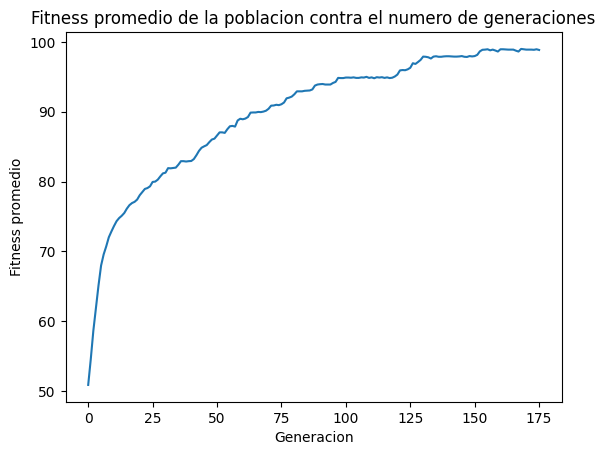

In [ ]:
Visualizacion.fitnesVSgeneraciones(pob)

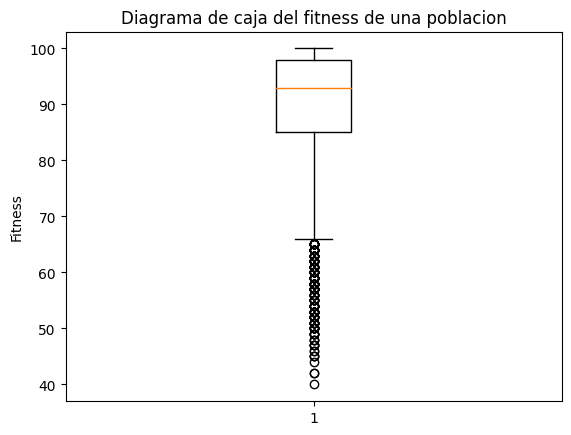

In [ ]:
Visualizacion.diagramaCaja(pob)

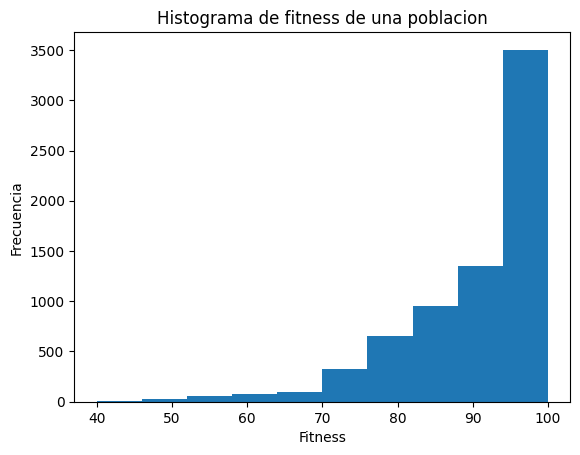

In [ ]:
Visualizacion.histogramaFitness(pob)

## Segundo experimento

In [ ]:
N_cantidad_cromosomas = 250
cantidad_individuos = 120
num_max_generaciones = 700
prob_mutacion = 0.1
prob_cruce = 0.85
n_seleccionados = 15

In [ ]:
pob2 = AG(N_cantidad_cromosomas, cantidad_individuos, num_max_generaciones, prob_mutacion, prob_cruce, n_seleccionados)

GENERATION:  1
GENERATION:  2
GENERATION:  3
GENERATION:  4
GENERATION:  5
GENERATION:  6
GENERATION:  7
GENERATION:  8
GENERATION:  9
GENERATION:  10
GENERATION:  11
GENERATION:  12
GENERATION:  13
GENERATION:  14
GENERATION:  15
GENERATION:  16
GENERATION:  17
GENERATION:  18
GENERATION:  19
GENERATION:  20
GENERATION:  21
GENERATION:  22
GENERATION:  23
GENERATION:  24
GENERATION:  25
GENERATION:  26
GENERATION:  27
GENERATION:  28
GENERATION:  29
GENERATION:  30
GENERATION:  31
GENERATION:  32
GENERATION:  33
GENERATION:  34
GENERATION:  35
GENERATION:  36
GENERATION:  37
GENERATION:  38
GENERATION:  39
GENERATION:  40
GENERATION:  41
GENERATION:  42
GENERATION:  43
GENERATION:  44
GENERATION:  45
GENERATION:  46
GENERATION:  47
GENERATION:  48
GENERATION:  49
GENERATION:  50
GENERATION:  51
GENERATION:  52
GENERATION:  53
GENERATION:  54
GENERATION:  55
GENERATION:  56
GENERATION:  57
GENERATION:  58
GENERATION:  59
GENERATION:  60
GENERATION:  61
GENERATION:  62
GENERATION:  63
G

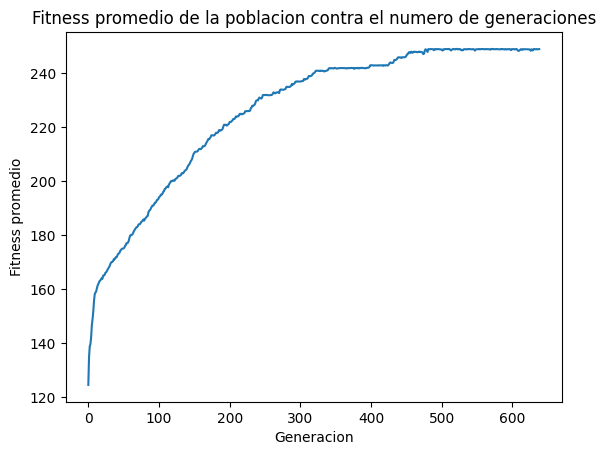

In [ ]:
Visualizacion.fitnesVSgeneraciones(pob2)

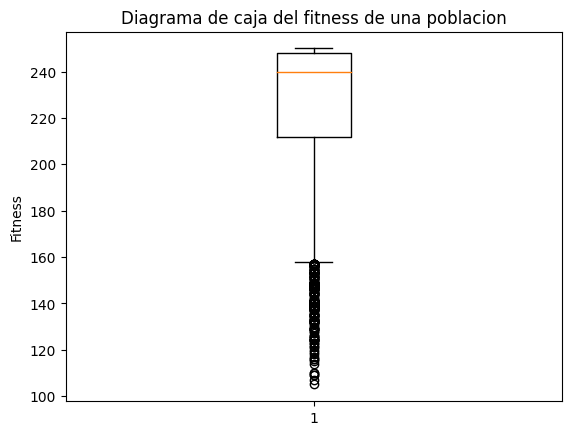

In [ ]:
Visualizacion.diagramaCaja(pob2)

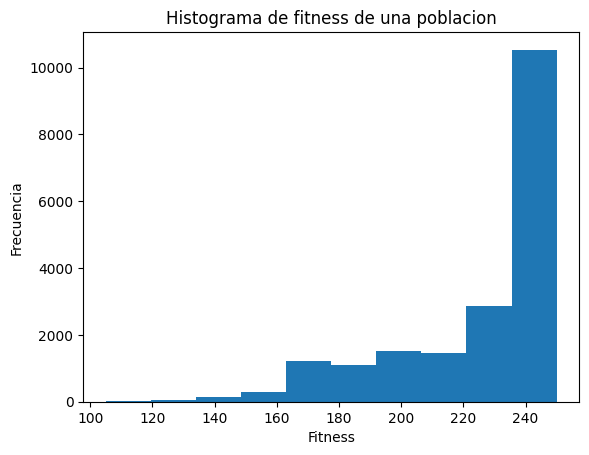

In [ ]:
Visualizacion.histogramaFitness(pob2)

## Tercer experimento

In [ ]:
N_cantidad_cromosomas = 500
cantidad_individuos = 120
num_max_generaciones = 700
prob_mutacion = 0.1
prob_cruce = 0.75
n_seleccionados = 5

In [ ]:
pob3 = AG(N_cantidad_cromosomas, cantidad_individuos, num_max_generaciones, prob_mutacion, prob_cruce, n_seleccionados)

GENERATION:  1
GENERATION:  2
GENERATION:  3
GENERATION:  4
GENERATION:  5
GENERATION:  6
GENERATION:  7
GENERATION:  8
GENERATION:  9
GENERATION:  10
GENERATION:  11
GENERATION:  12
GENERATION:  13
GENERATION:  14
GENERATION:  15
GENERATION:  16
GENERATION:  17
GENERATION:  18
GENERATION:  19
GENERATION:  20
GENERATION:  21
GENERATION:  22
GENERATION:  23
GENERATION:  24
GENERATION:  25
GENERATION:  26
GENERATION:  27
GENERATION:  28
GENERATION:  29
GENERATION:  30
GENERATION:  31
GENERATION:  32
GENERATION:  33
GENERATION:  34
GENERATION:  35
GENERATION:  36
GENERATION:  37
GENERATION:  38
GENERATION:  39
GENERATION:  40
GENERATION:  41
GENERATION:  42
GENERATION:  43
GENERATION:  44
GENERATION:  45
GENERATION:  46
GENERATION:  47
GENERATION:  48
GENERATION:  49
GENERATION:  50
GENERATION:  51
GENERATION:  52
GENERATION:  53
GENERATION:  54
GENERATION:  55
GENERATION:  56
GENERATION:  57
GENERATION:  58
GENERATION:  59
GENERATION:  60
GENERATION:  61
GENERATION:  62
GENERATION:  63
G

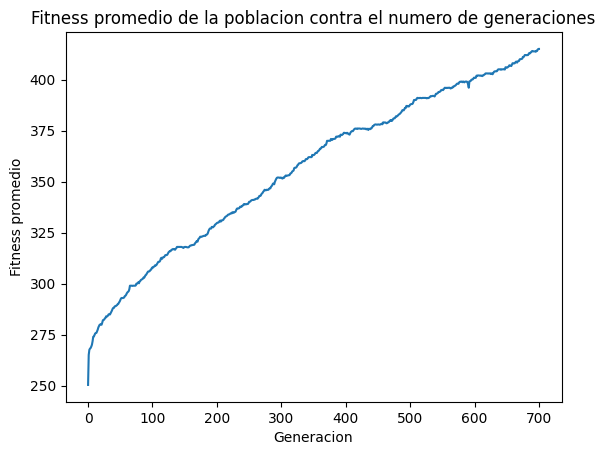

In [ ]:
Visualizacion.fitnesVSgeneraciones(pob3)

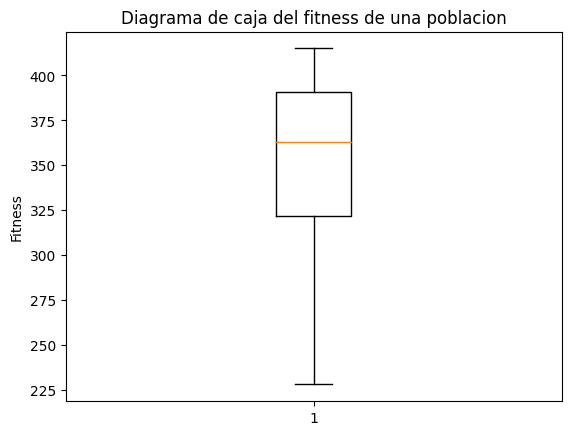

In [ ]:
Visualizacion.diagramaCaja(pob3)

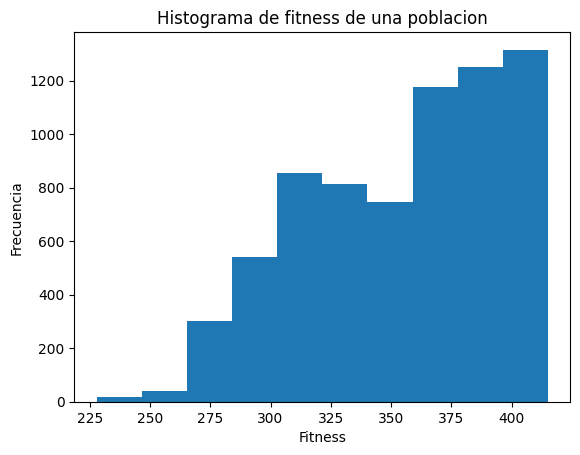

In [ ]:
Visualizacion.histogramaFitness(pob3)